Устанавливаем необходимые для работы зависимости

In [31]:
!pip install pykeen networkx matplotlib

Далее, импортируем необходимых модулей

In [2]:
import torch
import pykeen
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from sklearn.neighbors import NearestNeighbors
from pykeen.evaluation import RankBasedEvaluator
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

INFO:pykeen.utils:Using opt_einsum


Здесь мы устанавливаем необходимые библиотеки и импортируем модули, которые будут использоваться в лабораторной работе.

## Взаимодействие с графовым датасетом и описание данных

В данной работе мы будем использовать графовый датасет [DBpedia50](https://arxiv.org/abs/1711.03438), предоставляющий собой выборку менее 50 тысяч сущностей из графа dbpedia.


In [3]:
from pykeen.datasets import DBpedia50

In [4]:
# Загрузка графового датасета DBpedia50
dbpedia_dataset = DBpedia50()

In [5]:
# Просмотр описания датасета
print(dbpedia_dataset)

DBpedia50(training_path="/root/.data/pykeen/datasets/dbpedia50/train.txt", testing_path="/root/.data/pykeen/datasets/dbpedia50/test.txt", validation_path="/root/.data/pykeen/datasets/dbpedia50/valid.txt")


# Обучение модели ComplEx на 100 эпохах


Использеум pipeline() предоставляемый пакетом pykeen для обучения модели, в качестве аргументов указываем тип модели, набор данных, количество эпох обучения и устройство на котором проводится обучений

Проверяем наличие GPU устройства и вызываем функцию pipeline(), которая запускает процесс обучения модели, тестирования и валидации.

In [6]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Запускаем пайплайн обучения модели, в этот раз использем модель [ComplEx](https://pykeen.readthedocs.io/en/stable/api/pykeen.models.ComplEx.html)

In [7]:
# Задаем параметры для pipeline
pipeline_results = pipeline(
    model="ComplEx",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.38s seconds



В PyKEEN, функция plot_losses используется для визуализации изменения значений функции потерь во времени (по эпохам) в процессе обучения модели. Эта функция часто используется для мониторинга производительности модели во время тренировки и может быть полезной для оценки, насколько хорошо модель учится на обучающем наборе данных.


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

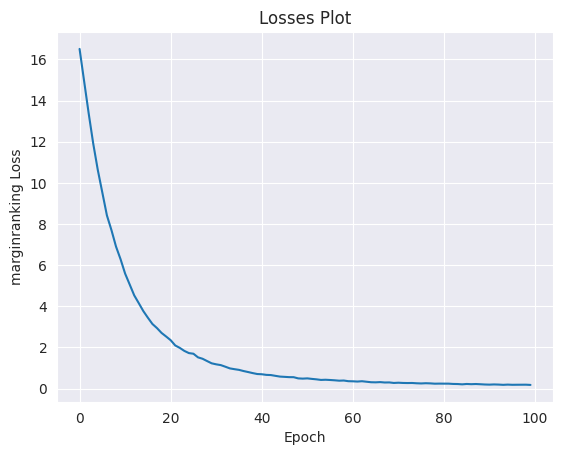

In [8]:
# Обученная модель хранится в pipeline_results
model = pipeline_results.model

#plot loss
pipeline_results.plot_losses()

## Метрики оценки работы модели

В PyKEEN пакет metrics предоставляет реализацию различных метрик, которые могут быть использованы для оценки качества работы моделей знаний (knowledge graph embedding models). Эти метрики позволяют оценивать, насколько хорошо модель справляется с предсказанием троек в графе знаний.

Некоторые из основных метрик, доступных в пакете metrics:

*   Rank-based Metrics - которые измеряют позицию верного ответа (положительной тройки) в отсортированном списке всех возможных троек
*   Top-K Metrics - которые оценивают качество предсказаний в топ-K результатах.
*   Clustering Metrics - которые измеряют качество кластеризации.

Рассчитаем некоторые из них далее.

In [9]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

# Оценить работу модели
metrics = evaluator.evaluate(pipeline_results.model, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.37s seconds


Hits@1: 0.003579952267303103
Hits@3: 0.004534606205250597
Hits@5: 0.005727923627684964
Hits@10: 0.007875894988066826
Mean Reciprocal Rank: 0.005334326531738043


## Получение представлений узлов

После того как модель обучена, мы можем полчить представления узлов и отношений из результатов работы пайплайна.

In [10]:
node_embeddings = pipeline_results.model.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

Мы извлекаем представления узлов из обученной модели. В этом контексте, представления узлов - это векторы, представляющие сущности в графе.


Далее извлечем лейблы для сущнойстей и визуализируем некоторые из сущностей на плоскости.

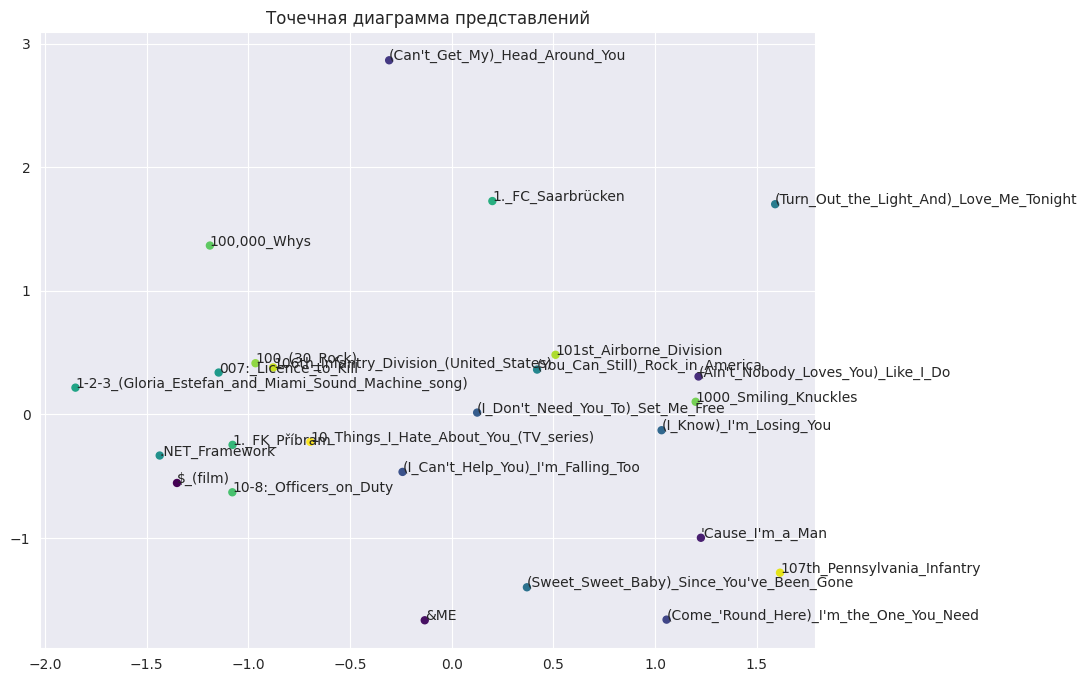

In [11]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

def visualize_embeddings(embeddings, labels):
    # Scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.arange(len(labels)), cmap='viridis', s=25)

    # Добавляем лейблы к точкаи на графике
    for i, label in enumerate(labels):
        plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), alpha=1)

    plt.title('Точечная диаграмма представлений')
    plt.show()

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

Мы используем NetworkX и Matplotlib для визуализации представлений узлов на графе. Каждая сущность представлена точкой в двумерном пространстве, и близкие точки соответствуют похожим узлам в графе.


## Измерение Node Similarity

Добавим код для измерения близости узлов на основе представлений. Расчитаем близость между несколькими случайными узлами. Используем для этого косинусную схожесть, манхэттенское и евклидово расстояние. Визуализируем полученные результаты как матрицу близости.


[[ 0.       28.586472 29.38558  28.34889 ]
 [28.586472  0.       28.809862 27.780527]
 [29.38558  28.809862  0.       27.812986]
 [28.34889  27.780527 27.812986  0.      ]]


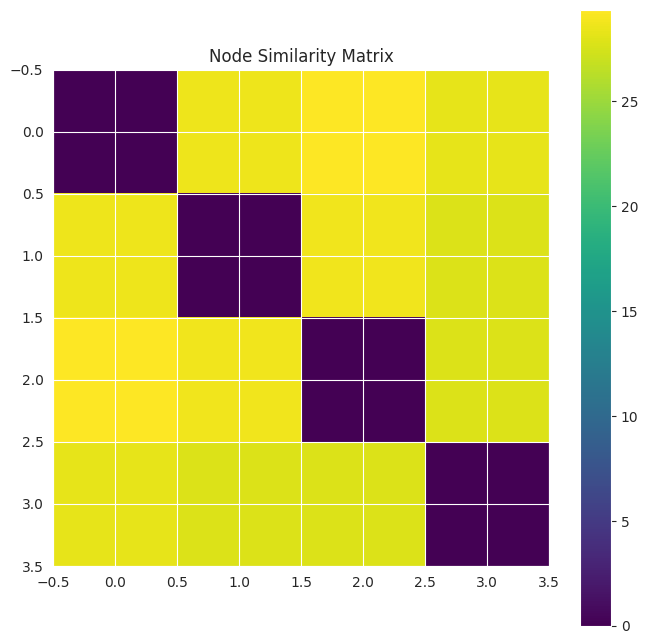

[[ 1.         -0.00699752 -0.01106235  0.0102671 ]
 [-0.00699752  0.99999976 -0.04539705 -0.02638088]
 [-0.01106235 -0.04539705  0.9999999   0.02634662]
 [ 0.0102671  -0.02638088  0.02634662  1.0000001 ]]


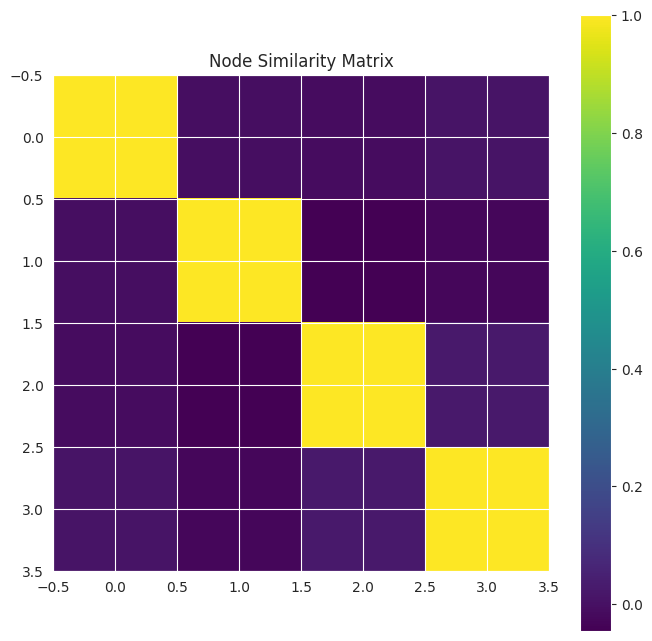

[[  0.         446.29944269 473.13591618 465.46452433]
 [446.29944269   0.         464.13857494 444.31913941]
 [473.13591618 464.13857494   0.         441.38908908]
 [465.46452433 444.31913941 441.38908908   0.        ]]


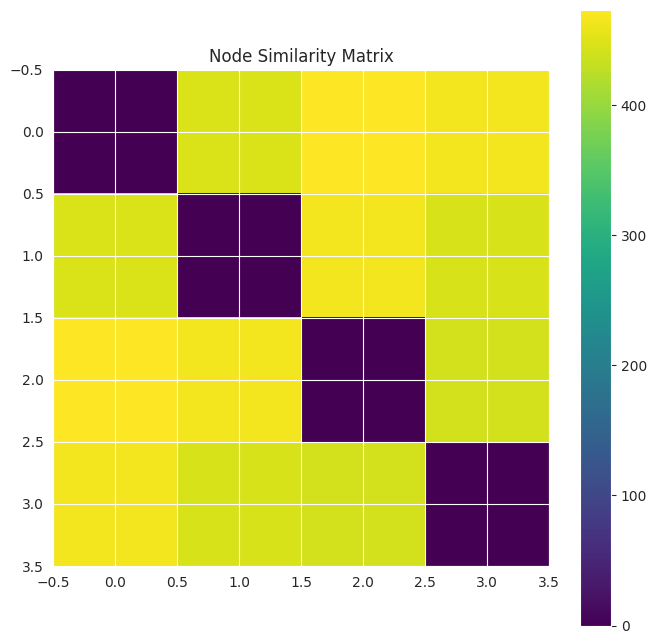

In [12]:
def diplay_matrix(similarity_matrix):
  # Визуализация матрицы близости
  plt.figure(figsize=(8, 8))
  plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
  plt.colorbar()
  plt.title('Node Similarity Matrix')
  plt.show()


# Рассчет близости между узлами
methods = [euclidean_distances,cosine_similarity,manhattan_distances]
#Узлы
nodes = [embedding_numpy[1324],embedding_numpy[12240],embedding_numpy[15386],embedding_numpy[17242]]
for method in methods:
  similarity_matrix = method(nodes)
  print(similarity_matrix)
  diplay_matrix(similarity_matrix)

Этот код использует euclidean_distances,cosine_similarity и manhattan_distances из scikit-learn для вычисления матрицы близости между узлами на основе их представлений. Затем мы визуализируем эту матрицу для наглядного представления Node Similarity.

## Поиск соседей узла
Одной из задач где используется схожесть узлов является задача поиска ближайших соседей конкретного узла в графе.
Рассмотрии применение NearestNeighbors на созданных представлениях с использованием только что рассмотренных методов рассчета близости.

In [13]:
# Выбираем случайный узел
random_node_index = 517
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       24.57383  24.73441  24.802565]]
Индексы:[[  517  4150  6216 17738]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', 'Charlotte_Brontë', 'E._Roland_Harriman', 'Real_Gangstaz'] 

Метрика:cosine
Дистанции:[[0.        0.8003316 0.8037127 0.8068478]]
Индексы:[[ 517 1977 7004 6943]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', 'Arup_Group', 'FC_Biel-Bienne', 'Ex_Norwegian'] 

Метрика:manhattan
Дистанции:[[  0.         388.809021   390.41833496 393.70697021]]
Индексы:[[  517 17886 23798  4150]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', 'Replenishment_oiler', 'What_a_Wonderful_World_(LeAnn_Rimes_album)', 'Charlotte_Brontë'] 



In [14]:
# Выбираем второй случайный узел
random_node_index = 2738
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[3.3717478e-07 2.4423399e+01 2.4565466e+01 2.4685432e+01]]
Индексы:[[ 2738 17121 14224 22754]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'Pori', 'Mersudin_Ahmetović', 'U.S._Route_460'] 

Метрика:cosine
Дистанции:[[0.         0.76878446 0.79962194 0.80014914]]
Индексы:[[ 2738 15328  3028 24147]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'Neobaryssinus', 'Blue_Mode', 'Words_of_Wisdom_and_Hope'] 

Метрика:manhattan
Дистанции:[[  0.         385.09683228 390.76513672 391.81637573]]
Индексы:[[ 2738 11395 22754 14224]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'Junior_Lewis', 'U.S._Route_460', 'Mersudin_Ahmetović'] 



# Модель ComplEx, число эпох 20

In [15]:
pipeline_results = pipeline(
    model="ComplEx",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=20),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.42s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

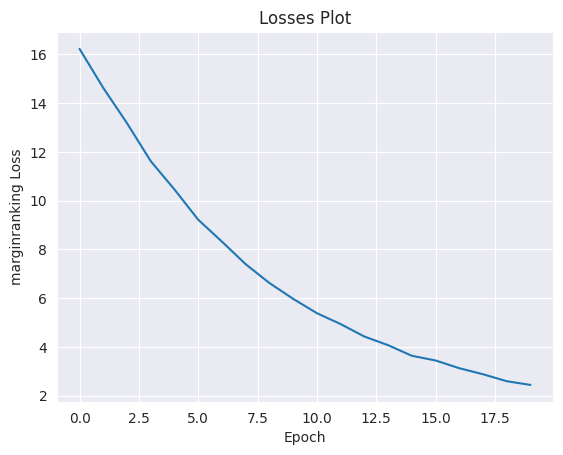

In [16]:
pipeline_results.plot_losses()

In [17]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

model_v2 = pipeline_results.model

# Оценить работу модели
metrics = evaluator.evaluate(model_v2, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.38s seconds


Hits@1: 0.00023866348448687351
Hits@3: 0.0009546539379474941
Hits@5: 0.0009546539379474941
Hits@10: 0.0019093078758949881
Mean Reciprocal Rank: 0.0011602172162383795


In [18]:
node_embeddings = model_v2.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

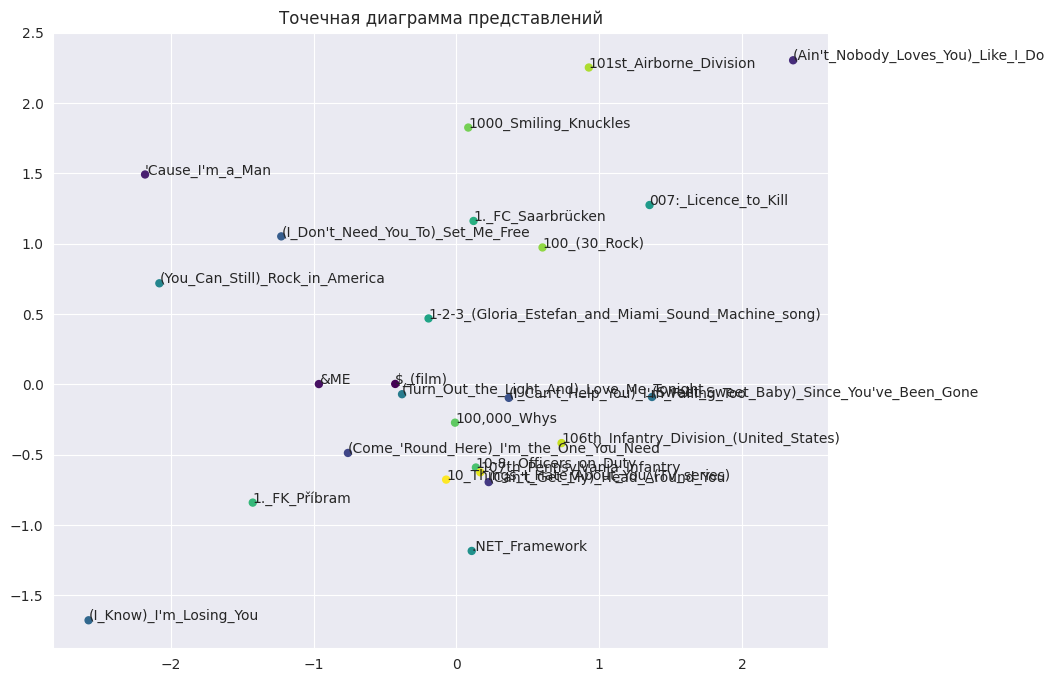

In [19]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

In [21]:
# Выбираем случайный узел
random_node_index = 517
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       25.362774 25.63627  25.65453 ]]
Индексы:[[  517    34 18819 10231]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', '12-Bar_Original', 'Sam_Weaver', 'It_Happened_Here'] 

Метрика:cosine
Дистанции:[[0.        0.802364  0.8171412 0.8186779]]
Индексы:[[  517 23812 20463 11861]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', 'When_You_Come_Home', 'Sukhoi', 'Kevin_Brock_(American_football)'] 

Метрика:manhattan
Дистанции:[[  0.         403.94619751 404.1277771  406.65835571]]
Индексы:[[  517  5343 10231  6615]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', 'Davao_River', 'It_Happened_Here', 'End_of_the_Line_(Traveling_Wilburys_song)'] 



In [22]:
# Выбираем второй случайный узел
random_node_index = 2738
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[3.3717478e-07 2.4015539e+01 2.4042433e+01 2.4108154e+01]]
Индексы:[[ 2738  6981 22749 17552]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'Ezra_Klein', 'U.S._Route_1_in_Maine', 'Raid_on_Rommel'] 

Метрика:cosine
Дистанции:[[0.         0.80108756 0.8093469  0.81456375]]
Индексы:[[ 2738 12909 22263 19603]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'Live_for_You_(album)', 'Timetrap', 'Simon_Corbell'] 

Метрика:manhattan
Дистанции:[[  0.         374.56387329 380.66769409 381.3114624 ]]
Индексы:[[ 2738 17552 11614 23488]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'Raid_on_Rommel', 'Kalisham_Rural_District', 'WTDR_(AM)'] 



# Модель HolE, число эпох 100

In [23]:
pipeline_results = pipeline(
    model="HolE",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 4.45s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

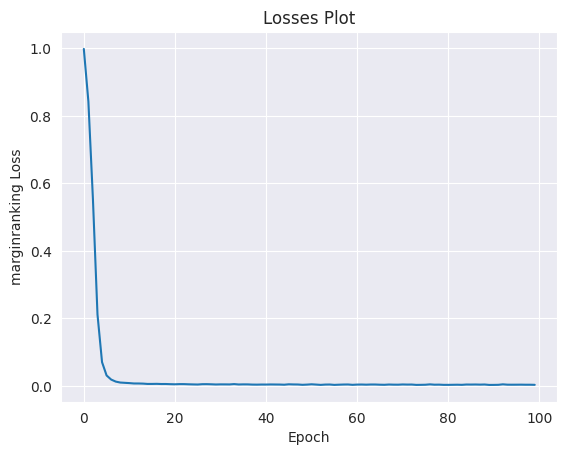

In [24]:
pipeline_results.plot_losses()

In [25]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

model_v3 = pipeline_results.model

# Оценить работу модели
metrics = evaluator.evaluate(model_v3, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 4.43s seconds


Hits@1: 0.20787589498806683
Hits@3: 0.23484486873508353
Hits@5: 0.24606205250596658
Hits@10: 0.26276849642004774
Mean Reciprocal Rank: 0.22778448462486267


In [26]:
node_embeddings = model_v3.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

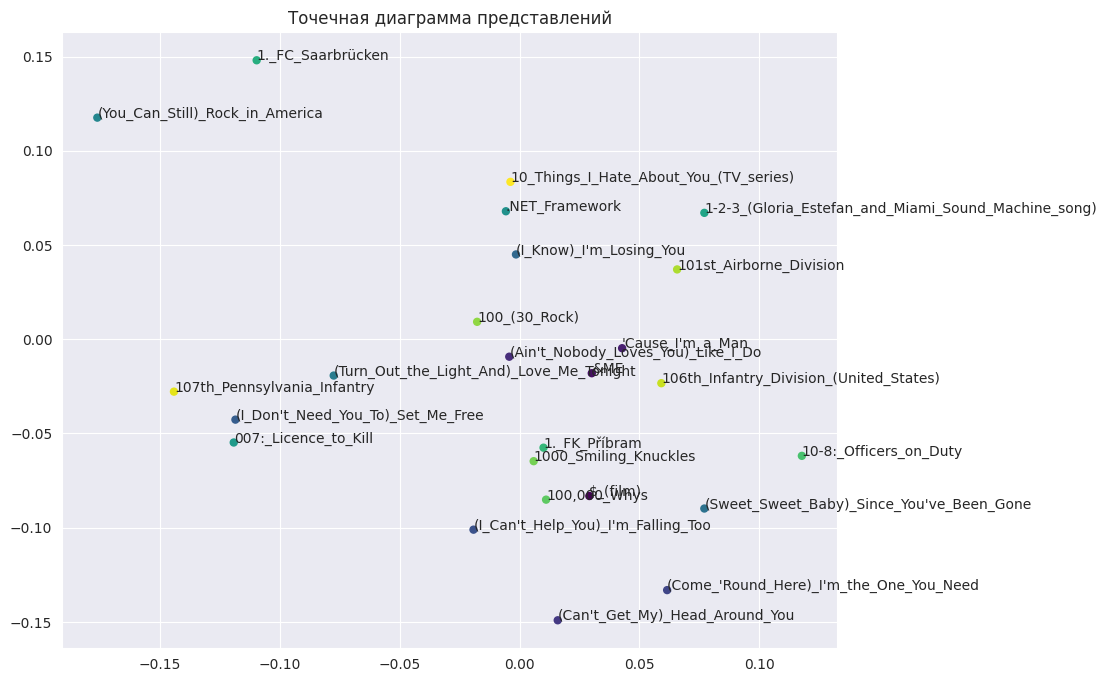

In [27]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

In [29]:
# Выбираем случайный узел
random_node_index = 517
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.         0.995655   0.99724066 1.0069395 ]]
Индексы:[[  517 10887 16034 10658]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', 'Joey_DeMaio', 'Open_Letter_(To_a_Landlord)', 'Jeff_Young'] 

Метрика:cosine
Дистанции:[[0.         0.49566436 0.4972443  0.5069635 ]]
Индексы:[[  517 10887 16034 10658]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', 'Joey_DeMaio', 'Open_Letter_(To_a_Landlord)', 'Jeff_Young'] 

Метрика:manhattan
Дистанции:[[ 0.         11.45032215 11.462286   11.46711826]]
Индексы:[[  517 10887 10658 16034]]
Ближайшие соседи узла A_Date_with_The_Smithereens: ['A_Date_with_The_Smithereens', 'Joey_DeMaio', 'Jeff_Young', 'Open_Letter_(To_a_Landlord)'] 



In [30]:
# Выбираем второй случайный узел
random_node_index = 2738
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.        1.110727  1.1176838 1.1207726]]
Индексы:[[ 2738 21756 18696  3026]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'The_Rajah_(album)', 'Sacredly_Agnezious', 'Blue_Hour'] 

Метрика:cosine
Дистанции:[[0.         0.6433661  0.68375176 0.68509287]]
Индексы:[[ 2738 18696  5971  6036]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'Sacredly_Agnezious', 'Don_Friedman', 'Doudou_Gouirand'] 

Метрика:manhattan
Дистанции:[[ 0.         12.58648014 12.59591103 12.63730717]]
Индексы:[[ 2738 18696  6036  8998]]
Ближайшие соседи узла Bernt_Moen: ['Bernt_Moen', 'Sacredly_Agnezious', 'Doudou_Gouirand', 'Harry_Barris'] 

